## Principal Components

- Widely used feature extraction method for analysis and visualization
- Orthonormal basis functions 
- Require good data engineering as a precursor to their use

In [1]:


# Data processing and functions
import pandas as pd
import numpy as np
import scipy as sp

# Analytics and modeling
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import manifold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment
from patsy import dmatrices

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig

# Setting graphing preferences
sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

/Users/Pan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Pan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### In-Class Exercise 1
### Community Crime Data: Load the data


- Load the community crime data: CommunityCrimeDataRaw.txt
- The data do not have a header row, this is in a separate file: CrimeVariableLabels.txt
- Read crime.description.txt to determine the missing value character

In [2]:
path="/Users/Pan/Google Drive/Data Science/DS6001/"
crimes_df=pd.read_csv(path+"CommunityCrimeDataRaw.txt", header=None,na_values="?")
crimes_df.shape

(2215, 147)

In [3]:
header_file="CrimeVariableLabels.txt"
crimes_header = pd.read_csv(path+header_file,header=None)
crimes_df.columns = crimes_header.loc[:,0]
crimes_df.head(3)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51


In [4]:
#8
crimes_df.columns
#dtype = None).astype(str)
# astype always returns a newly allocated array

Index(['communityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', name=0, length=147)

## In-Class Exercise 2  - Data Cleaning

- Remove the non-predictor/response variables (see 
http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized )

- Remove variables with more that 1k missing values
- Impute the remainder of the missing values

From the website: (125 predictive, 4 non-predictive, 18 potential goal) 
RM all the below
-- communityname: Community name - not predictive - for information only (string) 
-- state: US state (by 2 letter postal abbreviation)(nominal) 
-- countyCode: numeric code for county - not predictive, and many missing values (numeric) 
-- communityCode: numeric code for community - not predictive and many missing values (numeric) 
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer)  <<<<<-----not necessary



In [5]:
crimes_df.loc[:,crimes_df.isnull().sum()>0].isnull().sum()

0
countyCode              1221
communityCode           1224
OtherPerCap                1
LemasSwornFT            1872
LemasSwFTPerPop         1872
LemasSwFTFieldOps       1872
LemasSwFTFieldPerPop    1872
LemasTotalReq           1872
LemasTotReqPerPop       1872
PolicReqPerOffic        1872
PolicPerPop             1872
RacialMatchCommPol      1872
PctPolicWhite           1872
PctPolicBlack           1872
PctPolicHisp            1872
PctPolicAsian           1872
PctPolicMinor           1872
OfficAssgnDrugUnits     1872
NumKindsDrugsSeiz       1872
PolicAveOTWorked        1872
PolicCars               1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
PolicBudgPerPop         1872
rapes                    208
rapesPerPop              208
robberies                  1
robbbPerPop                1
assaults                  13
assaultPerPop             13
burglaries                 3
burglPerPop                3
larcenies                  3
larcPerPop  

In [6]:
#Take out non-predictor variables
crimes_df.drop(['communityname','state','countyCode','communityCode','fold',],axis=1,inplace=True)

crimes_df.shape

(2215, 142)

In [7]:
#Remove variables with more that 1k missing values
crimes_df.dropna(axis=1,thresh = (2215-1000),inplace=True)

crimes_df.shape
#many predictors have missing
#vialentCrimesPerPop (main response var) missing 221

(2215, 120)

In [8]:
#impute with mean 
#        with median for integer
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.
        
        Columns of dtype floating point are imputed with the mean.

        Columns of other types are imputed with median of the column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') 
                               else X[c].mean() if X[c].dtype == np.dtype('f')
                                else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [9]:
#Call the function above
crimes_df = DataFrameImputer().fit_transform(crimes_df)
#Check
crimes_df.isnull().sum()

0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
                        ..
MedOwnCostPctIncNoMtg    0
NumInShelters            0
NumStreet                0
PctForeignBorn           0
PctBornSameState         0
PctSameHouse85           0

In [10]:
#Save the clean data set
file = "CrimeDataClean.csv"
crimes_df.to_csv(path+file,index = False)

### In-Class Exercise 3 - Predictor and Response Variables

- Determine which variables are predictors and which are responses
- Further clean the response variables
- Graph the SPM and correlation heat map of the response variables
- Min-Max scale the response variables between 0 and 100.
- Min-Max scale the predictors between 0 and 100 (do this only for non percentage predictors)



combine with census data --> alot of demographic data  1995
predictor variable: 
first response var: "murder"


In [11]:
print(crimes_df.columns[:50])
print(crimes_df.columns[51:100])
print(crimes_df.columns[101:])

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar'],
      dtype='object', name=0)
Index(['NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentIm

In [12]:
crimes_df.loc[:,'murders':].describe()
#17 crime murder describe: some are zeros
#we have raw count & per pop count
#per pop count is favored.
#scaling --> certain var will not dominate.

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.00000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,7.764786,5.859296,26.069977,35.381549,237.853273,162.572953,324.940406,377.11556,760.483521,1033.144810,2135.745824,3372.581675,516.094357,473.733199,29.843341,31.698736,567.625567,4887.099228
std,58.166468,9.156829,100.719961,32.705405,2250.217247,234.441088,1982.210768,437.10334,3109.661160,762.876468,7595.594541,1900.058222,3255.996607,504.363503,176.459623,38.488835,586.844780,2680.842377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,0.000000,0.000000,3.000000,13.390000,5.000000,27.655000,18.500000,94.75000,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.985000,185.280000,2994.265000
50%,1.000000,2.170000,7.000000,26.920000,19.000000,74.800000,56.000000,226.52500,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,3.000000,8.365000,17.000000,48.705000,70.000000,187.150000,178.500000,502.61500,507.500000,1348.670000,1673.000000,4334.675000,231.500000,589.225000,15.000000,41.435000,722.000000,6100.870000
max,1946.000000,91.090000,2818.000000,401.350000,86001.000000,2264.130000,62778.000000,4932.50000,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [13]:
#Remove the raw columns and leave just per pop
#Notice that we keep the last two

response_start = crimes_df.columns.get_loc('murders')
#list of perpop columns
cols = list(range(response_start+1,118,2))
#add the last two response variables
cols.extend([118,119])
#final list
crimes_df.columns[cols]

Index(['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop',
       'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop'],
      dtype='object', name=0)

In [14]:
crimes_response_df = crimes_df[crimes_df.columns[cols]]
crimes_response_df.describe()

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.00000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.859296,35.381549,162.572953,377.11556,1033.144810,3372.581675,473.733199,31.698736,567.625567,4887.099228
std,9.156829,32.705405,234.441088,437.10334,762.876468,1900.058222,504.363503,38.488835,586.844780,2680.842377
min,0.000000,0.000000,0.000000,0.00000,16.920000,77.860000,6.550000,0.000000,0.000000,116.790000
25%,0.000000,13.390000,27.655000,94.75000,512.185000,2040.740000,157.060000,7.985000,185.280000,2994.265000
50%,2.170000,26.920000,74.800000,226.52500,822.715000,3079.510000,302.355000,21.080000,374.060000,4425.450000
75%,8.365000,48.705000,187.150000,502.61500,1348.670000,4334.675000,589.225000,41.435000,722.000000,6100.870000
max,91.090000,401.350000,2264.130000,4932.50000,11881.020000,25910.550000,4968.590000,436.370000,4877.060000,27119.760000


In [15]:
#Scale the response variable to 0,100
#Needed for the Principal Component Analysis

from sklearn.preprocessing import MinMaxScaler
cols = crimes_response_df.columns
scaler = MinMaxScaler(feature_range=(0,100))
response_scaled_df = \
pd.DataFrame(scaler.fit_transform(crimes_response_df),
             columns = cols)
response_scaled_df.describe()

,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,6.432425,8.815634,7.180372,7.645526,8.565545,12.754079,9.415144,7.264188,11.638683,17.665869
std,10.052507,8.148849,10.354577,8.861700,6.430125,7.355247,10.164438,8.820229,12.032757,9.927954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.336240,1.221440,1.920933,4.174484,7.598434,3.033228,1.829869,3.799010,10.656143
50%,2.382259,6.707363,3.303697,4.592499,6.791876,11.619580,5.961359,4.830763,7.669785,15.956245
75%,9.183225,12.135293,8.265868,10.189863,11.225040,16.478404,11.742650,9.495382,14.804001,22.160822
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


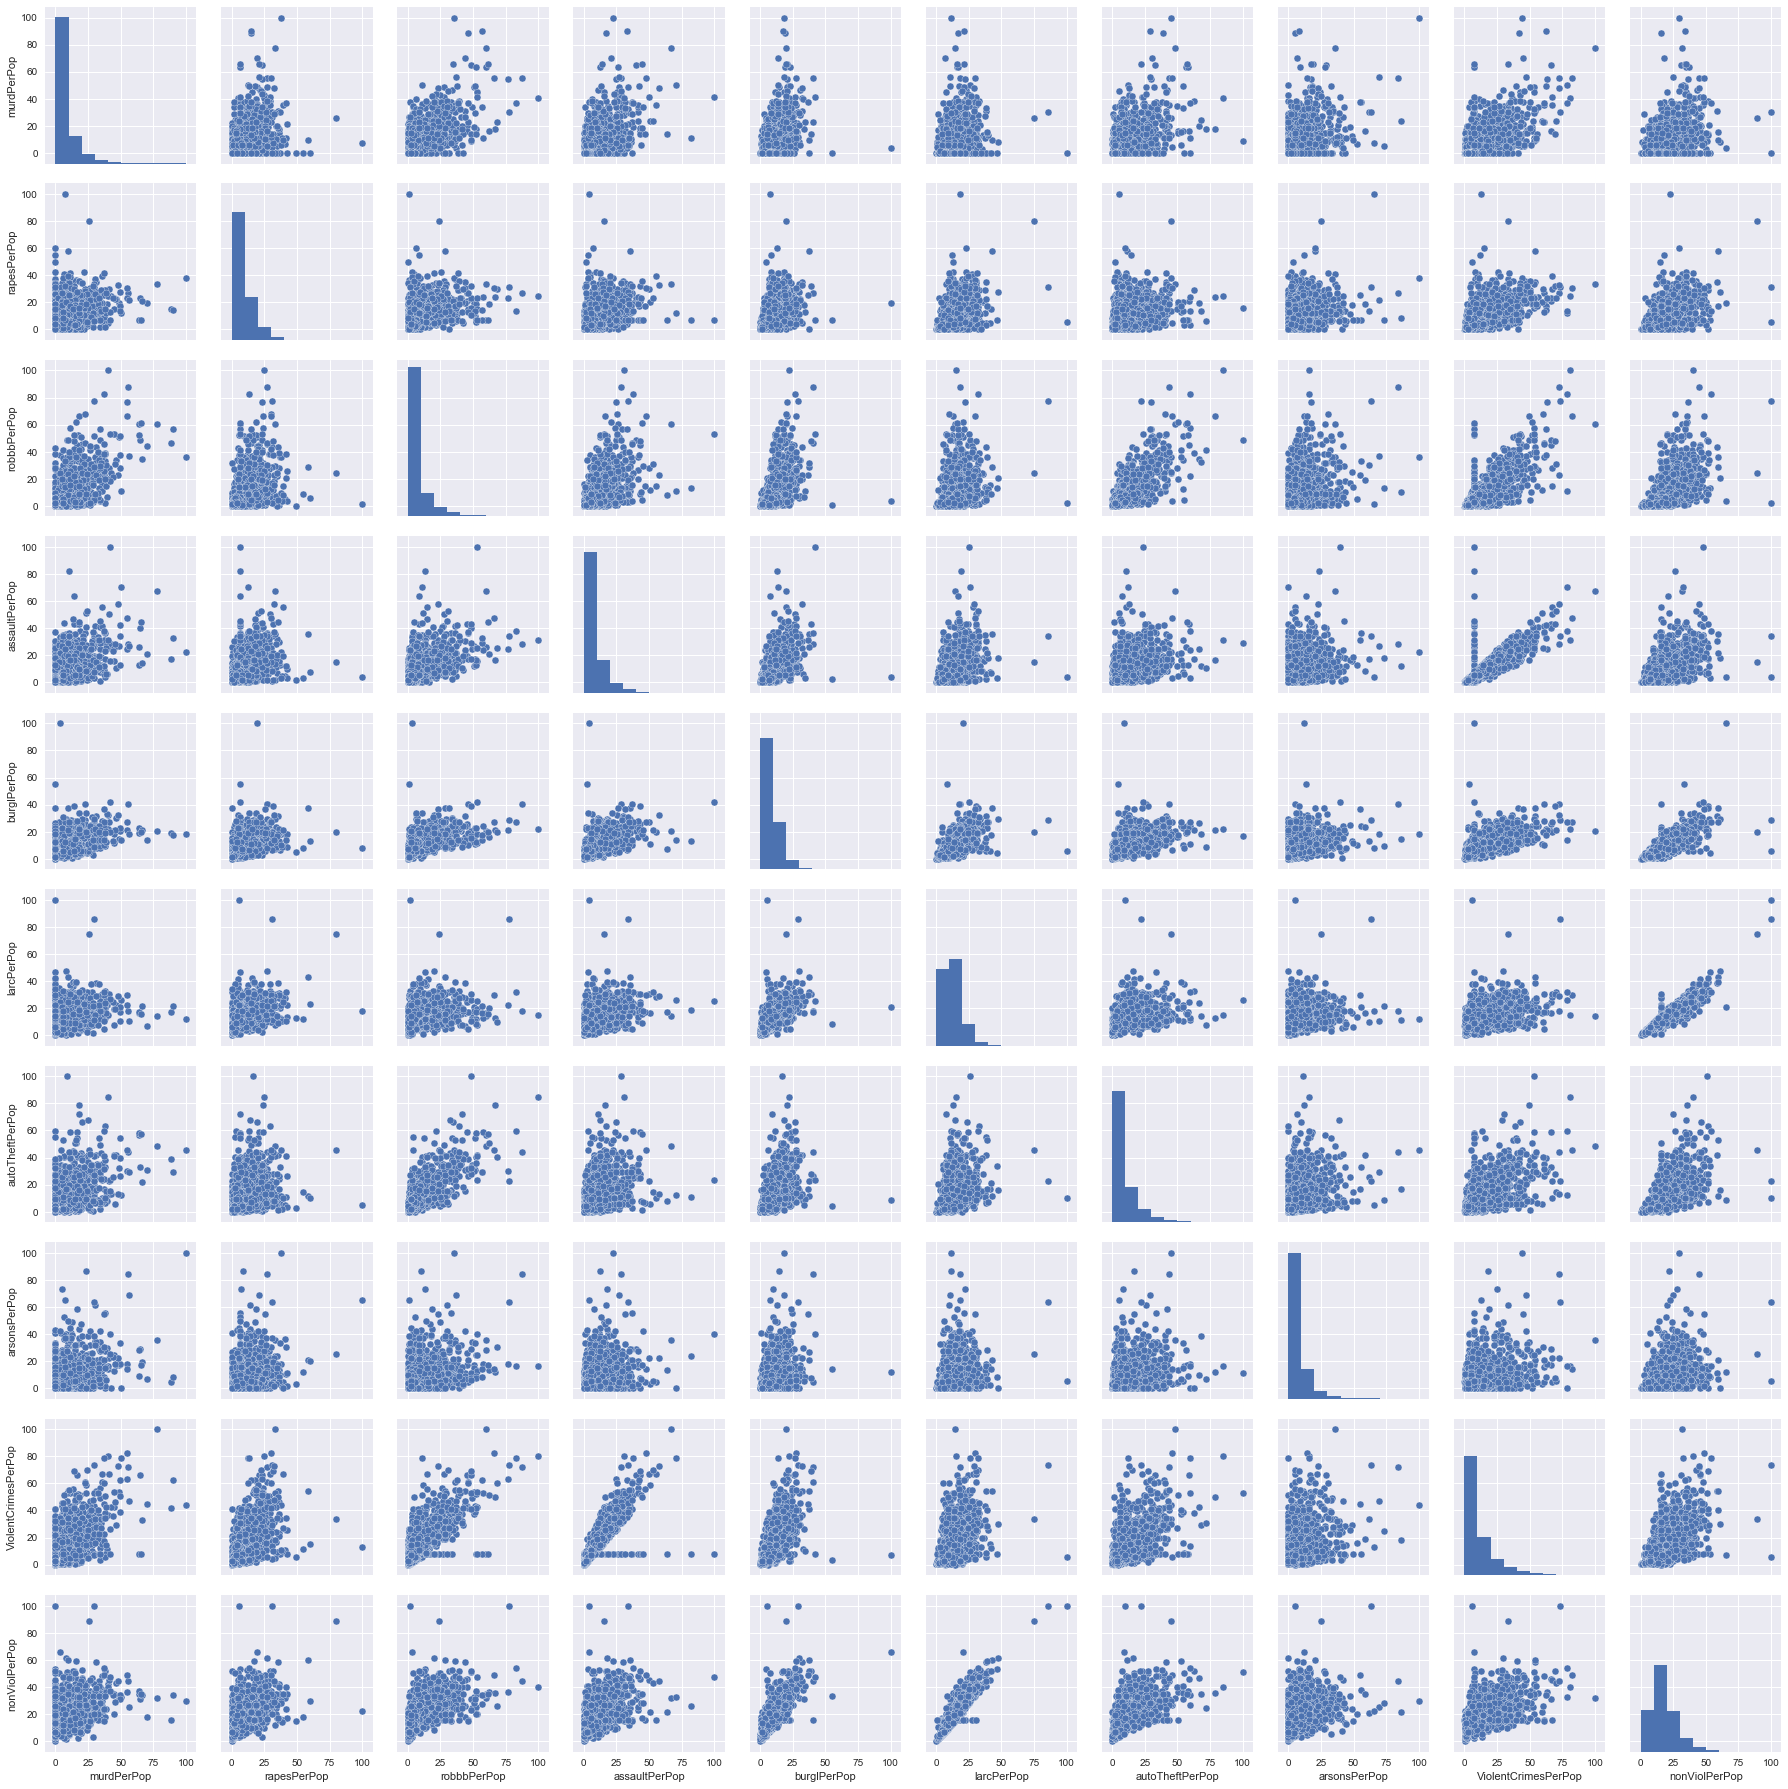

In [16]:
#pairs plot:
sns.pairplot(response_scaled_df)
#they correlate with each other, but not much
#histagram: highly skewed -->transform

#heatmap copy from last time

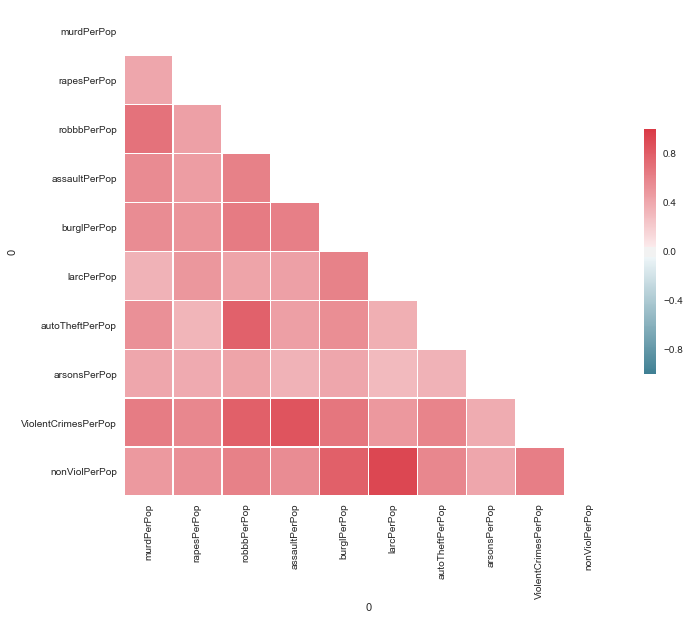

In [17]:
# Heat map to show correlations

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = response_scaled_df.corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
crimes_df.loc[:,:'PctSameState85'].describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,26.298104,20.990158,13.010203,66.953499,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,2.979297,2.987622,1.419679,564.253149,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,14.900000,14.000000,10.100000,0.000000,0.000000,0.180000,6.750000,11.830000,27.950000,32.830000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,24.300000,18.700000,12.000000,0.000000,0.000000,2.060000,50.110000,44.995000,72.060000,85.200000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,26.100000,21.000000,12.800000,0.000000,0.000000,4.310000,64.490000,52.170000,79.490000,90.030000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,28.000000,23.100000,13.700000,22.000000,1.000000,9.250000,74.855000,58.740000,85.135000,93.010000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,35.100000,32.700000,23.400000,23383.000000,10447.000000,60.400000,93.140000,78.560000,96.590000,99.900000


In [19]:
# get predictors DF
crimes_predictors_df = crimes_df.loc[:,:'LemasPctOfficDrugUn']
crimes_predictors_df.shape
crimes_predictors_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,...,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163
std,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,...,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128
min,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,...,0.000000,0.180000,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000
25%,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,8.750000,...,0.000000,2.060000,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000
50%,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,11.730000,...,0.000000,4.310000,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000
75%,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,14.415000,...,1.000000,9.250000,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000
max,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,52.770000,...,10447.000000,60.400000,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000


In [20]:
#get the var with max values >1k
#don't necessary to scale everything

#scale from 0 to 100
preds2scale = crimes_predictors_df.columns[crimes_predictors_df.apply('max',axis=0)>1e3]
predsnot2scale = crimes_predictors_df.columns[crimes_predictors_df.apply('max',axis=0)<=1e3]

print(preds2scale)
print(predsnot2scale)

Index(['population', 'numbUrban', 'medIncome', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'NumKidsBornNeverMar',
       'NumImmig', 'HousVacant', 'MedYrHousBuilt', 'OwnOccLowQuart',
       'OwnOccMedVal', 'OwnOccHiQuart', 'OwnOccQrange', 'RentLowQ',
       'RentMedian', 'RentHighQ', 'MedRent', 'NumInShelters', 'NumStreet',
       'LandArea', 'PopDens'],
      dtype='object', name=0)
Index(['householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       

In [21]:
#Scale the predictors with large values (>1k)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,100))

scaled_df = \
pd.DataFrame(scaler.fit_transform(crimes_predictors_df[preds2scale]),
             columns = preds2scale)
scaled_df.describe()

,population,numbUrban,medIncome,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,...,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,MedRent,NumInShelters,NumStreet,LandArea,PopDens
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,0.589575,0.651885,21.888215,22.876343,17.853310,17.507177,5.441142,2.547748,13.401770,6.892115,...,24.823656,17.106482,25.606052,35.021254,42.155412,38.252950,0.286334,0.170609,0.743085,6.272821
std,2.798203,2.807851,11.698150,11.085170,10.818150,10.014264,4.352302,3.094549,9.307461,5.784468,...,20.989975,11.814652,15.979874,19.376464,24.333429,20.923577,2.413091,2.349503,3.077211,6.397557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.059637,0.000000,13.028172,14.849760,10.962714,11.263372,3.178625,1.321875,7.804361,4.035401,...,9.771069,9.728097,12.694013,19.239501,22.466422,21.260816,0.000000,0.000000,0.179327,2.650164
50%,0.174864,0.246375,19.671660,20.403544,15.265651,15.148790,4.609183,2.061458,11.538643,5.975182,...,16.638371,13.111782,23.059867,31.441544,37.118437,33.992583,0.000000,0.000000,0.358654,4.561973
75%,0.451538,0.572450,28.419993,28.431639,21.627486,20.728802,6.848011,3.074479,16.321292,8.412409,...,33.870212,19.773414,35.698448,48.127128,58.302808,52.286774,0.094085,0.009572,0.706100,7.489162
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [22]:
#Joining both dataframes

crimes_scaled_preds_df = pd.concat([scaled_df,crimes_predictors_df[predsnot2scale]],axis=1)

crimes_scaled_preds_df.shape

(2215, 102)

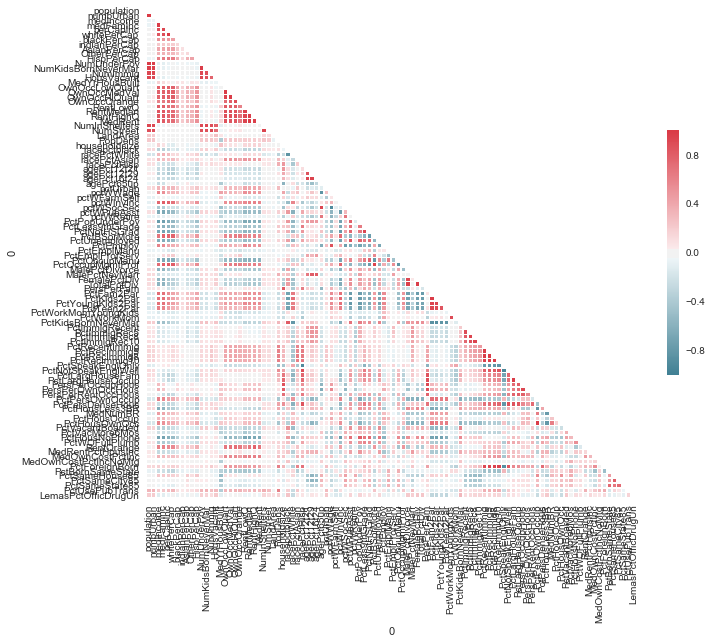

In [23]:
#multicoinearity with wobble linear regression
# Heat map to show correlations

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = crimes_scaled_preds_df.corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### In-Class Exercise 4 - Principal Component Analysis on the Response Variables

- Obtain the principal components for the response variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components

In [24]:
############
## perform PCA on the response variables

n = len(response_scaled_df.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_response_pca = pca.fit_transform(response_scaled_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_response_pca.shape


Percent of explained variance (first two components): 71


(2215, 10)

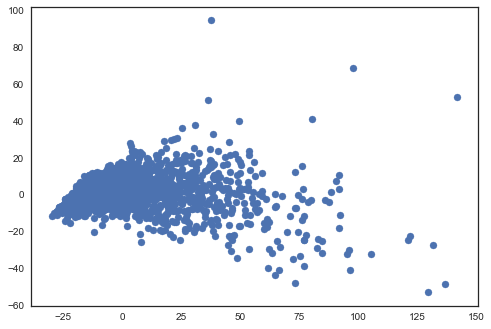

In [25]:
# # PCA scatter plot

plt.scatter(crimes_response_pca[:,0],crimes_response_pca[:,1])




In [26]:
# Towns/communities with > 0 reported murders.

murder_towns = crimes_df.murdPerPop > 0


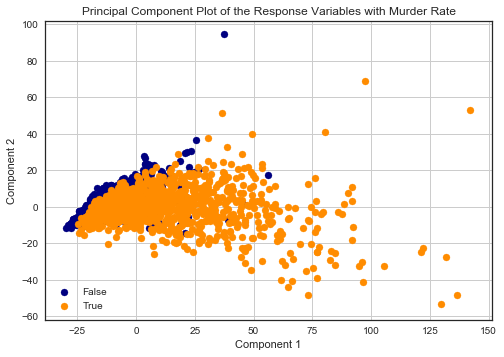

In [27]:
# PCA plot with labels for murder towns
colors = ['navy', 'darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True], colors):
        ax.scatter(crimes_response_pca[murder_towns == i, 0],
                   crimes_response_pca[murder_towns == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Response Variables with Murder Rate')


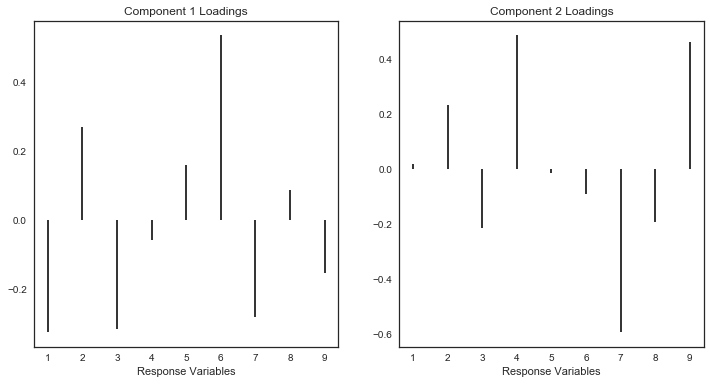

In [28]:
# PCA loadings
# Response Variables PCA
#loadings: weights on y; coefficients
#negative or positive doesn't matter


fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[1,:])
Comp1.set_xlabel('Response Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,len(crimes_response_df.columns)), [0],pca.components_[2,:])
Comp2.set_xlabel('Response Variables')
Comp2.set_title('Component 2 Loadings')


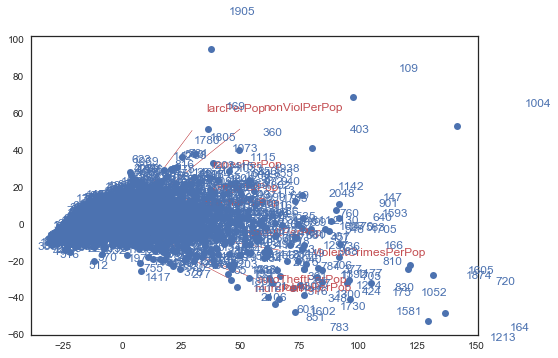

In [29]:
# # The biplot like the one in R
# # This will take a while to run

# ## project data into PC space
# first 2 PC

pca = PCA(n_components=2)
crimes_response_pca = pca.fit_transform(response_scaled_df)
# # 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = crimes_response_pca[:,0] # see 'prcomp(my_data)$x' in R
ys = crimes_response_pca[:,1]

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(response_scaled_df.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project observations (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2,
             list(response_scaled_df.index)[i], color='b')



### In-Class Exercise 4 - Principal Component Analysis on the Predictor Variables

- Obtain the principal components for the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

![ViolCrimePCA.png](attachment:ViolCrimePCA.png)


In [30]:
#they are stacked
#linear regress: from bad to good
#svm
#extreme gradiant boosting
#

In [31]:
############
## 38 perform PCA on the predictor variables

n = len(crimes_predictors_df.columns)

pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

crimes_predictors_pca = pca.fit_transform(crimes_scaled_preds_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_predictors_pca.shape

Percent of explained variance (first two components): 64


(2215, 102)

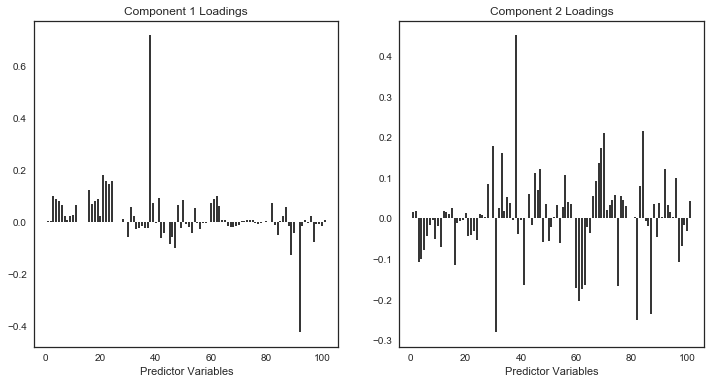

In [32]:
# 39pca loadings
# predictor variables PCA
fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,n), [0],pca.components_[1,:])
Comp1.set_xlabel('Predictor Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,n), [0],pca.components_[2,:])
Comp2.set_xlabel('Predictor Variables')
Comp2.set_title('Component 2 Loadings')

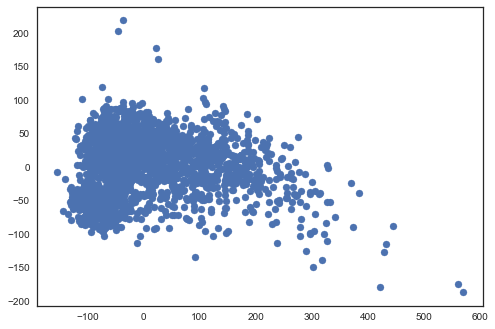

In [33]:
# 40 PCA Scatter
plt.scatter(crimes_predictors_pca[:,0],crimes_predictors_pca[:,1])

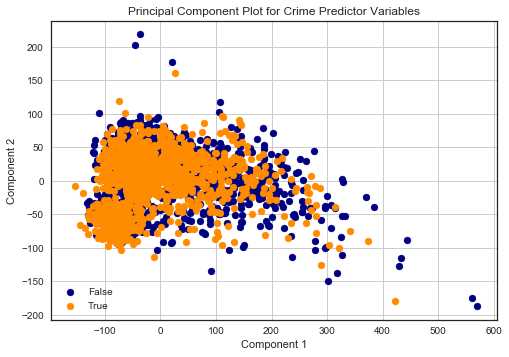

In [34]:
# 41 pca plot with labels for murder towns
colors = ['navy','darkorange']

fig, ax = plt.subplots()
for i, color in  zip([False, True],colors):
        ax.scatter(crimes_predictors_pca[murder_towns == i, 0],
                   crimes_predictors_pca[murder_towns == i, 1], c = color, label=i)
        
ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot for Crime Predictor Variables')

[0.0, 185.28, 374.06, 722.0, 1523.9200000000001]


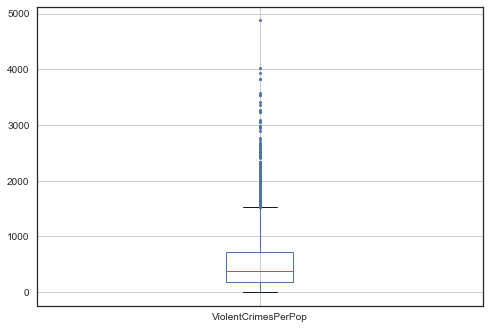

In [35]:
# 42 Violend crime categorical variable
# communities with different levels
# of violent crime defined by the box plot rule

crimesbox = crimes_response_df.boxplot(column = 'ViolentCrimesPerPop',return_type = 'dict', sym = 'b.')

# box plots stats
crimesbox_stats = [crimesbox['whiskers'][0].get_ydata()[1], # lower whisker
                crimesbox['boxes'][0].get_ydata()[0], # lower box 25%
                crimesbox['medians'][0].get_ydata()[0], # median
                crimesbox['boxes'][0].get_ydata()[2], # upper box 75%
                crimesbox['whiskers'][1].get_ydata()[1] # upper whisker
               ]
print(crimesbox_stats)

In [36]:
#43
crime_labels=['Great','OK','Neutral','Bad','Very Bad']

In [37]:
#44
bins=crimesbox_stats
bins.append(crimes_response_df['ViolentCrimesPerPop'].max())
bins

[0.0, 185.28, 374.06, 722.0, 1523.9200000000001, 4877.0600000000004]

In [38]:
#45
Violent_Crime = pd.cut(crimes_response_df['ViolentCrimesPerPop'],bins,labels = crime_labels)

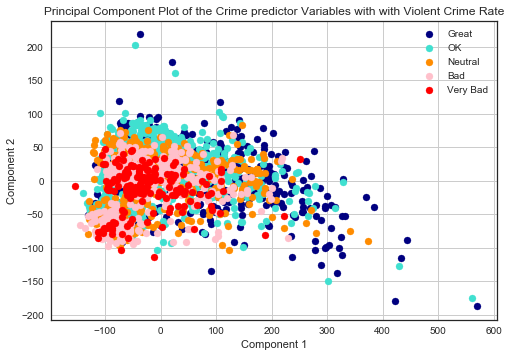

In [39]:
#46
#pca PLOT WITH LABELS FOR MURDER TOWNS
colors=['navy','turquoise','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_predictors_pca[Violent_Crime == i, 0],
                   crimes_predictors_pca[Violent_Crime == i, 1], 
                   c = color, label=i)

ax.legend(loc = 1)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Crime predictor Variables with with Violent Crime Rate')

#save the figure
savefig('ViolCrimePCA.png')



[116.79000000000001, 2994.2650000000003, 4425.4500000000007, 6100.8699999999999, 10739.530000000001]


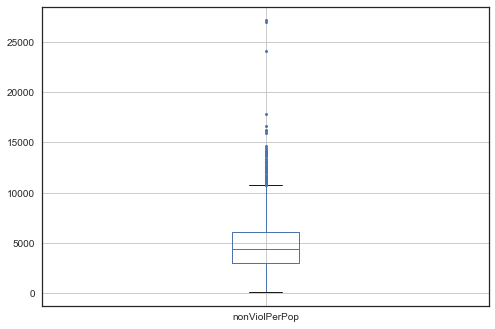

In [40]:
#49
#Non-violent crime categorical variable
#communities with different levels
#of non-violent crime defined by the box plot true
nonviolcrimesbox=crimes_response_df.boxplot(column="nonViolPerPop",return_type = 'dict', sym = 'b.')

# box plots stats
nonviolcrimesbox_stats = [nonviolcrimesbox['whiskers'][0].get_ydata()[1], # lower whisker
                nonviolcrimesbox['boxes'][0].get_ydata()[0], # lower box 25%
                nonviolcrimesbox['medians'][0].get_ydata()[0], # median
                nonviolcrimesbox['boxes'][0].get_ydata()[2], # upper box 75%
                nonviolcrimesbox['whiskers'][1].get_ydata()[1] # upper whisker
               ]
print(nonviolcrimesbox_stats)

In [41]:
#50 get the bins
bins=nonviolcrimesbox_stats
bins.append(crimes_response_df['nonViolPerPop'].max())
bins

[116.79000000000001,
 2994.2650000000003,
 4425.4500000000007,
 6100.8699999999999,
 10739.530000000001,
 27119.759999999998]

In [42]:
#51
crime_labels=['Great','OK','Neutral','Bad','Very Bad']

In [43]:
#52
NonViolent_Crime=pd.cut(crimes_response_df['nonViolPerPop'],bins,labels = crime_labels)
NonViolent_Crime

0         Great
1         Great
2           Bad
3            OK
4           Bad
5           Bad
6         Great
7       Neutral
8       Neutral
9           Bad
10          Bad
11          Bad
12      Neutral
13          Bad
14        Great
15      Neutral
16           OK
17           OK
18           OK
19          Bad
20           OK
21          Bad
22      Neutral
23      Neutral
24      Neutral
25      Neutral
26           OK
27          Bad
28          Bad
29           OK
         ...   
2185        Bad
2186        Bad
2187         OK
2188      Great
2189      Great
2190      Great
2191         OK
2192         OK
2193        Bad
2194         OK
2195      Great
2196         OK
2197      Great
2198         OK
2199      Great
2200      Great
2201    Neutral
2202    Neutral
2203    Neutral
2204        Bad
2205         OK
2206         OK
2207    Neutral
2208         OK
2209      Great
2210        Bad
2211    Neutral
2212    Neutral
2213    Neutral
2214        Bad
Name: nonViolPerPop, Len

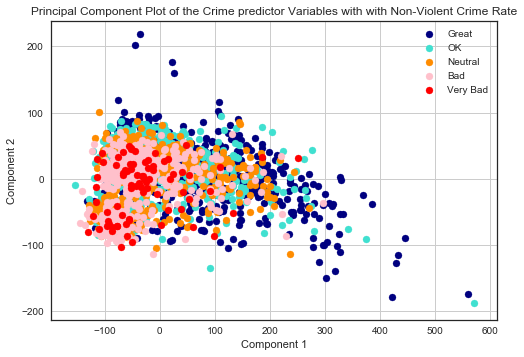

In [44]:
#53

#pca PLOT WITH LABELS FOR MURDER TOWNS
colors=['navy','turquoise','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_predictors_pca[NonViolent_Crime == i, 0],
                   crimes_predictors_pca[NonViolent_Crime == i, 1], 
                   c = color, label=i)

ax.legend(loc = 1)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Crime predictor Variables with with Non-Violent Crime Rate')

#save the figure
savefig('ViolCrimePCA.png')



[0.0, 0.0, 2.1699999999999999, 8.3649999999999984, 20.879999999999999]


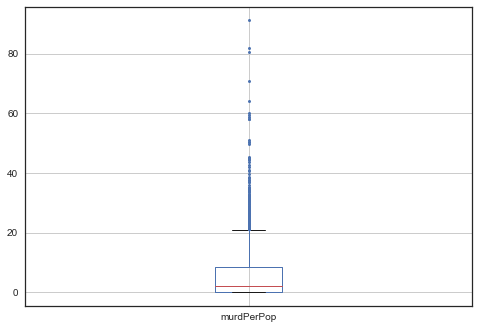

In [45]:
#54
#murder as categorical variable
#communities with different levels
#of murder defined by the box plot rule

murderbox = crimes_response_df.boxplot(column="murdPerPop",return_type = 'dict', sym = 'b.')

# box plots stats
murderbox_stats = [murderbox['whiskers'][0].get_ydata()[1], # lower whisker
                murderbox['boxes'][0].get_ydata()[0], # lower box 25%
                murderbox['medians'][0].get_ydata()[0], # median
                murderbox['boxes'][0].get_ydata()[2], # upper box 75%
                murderbox['whiskers'][1].get_ydata()[1] # upper whisker
               ]
print(murderbox_stats)

In [46]:
#55
#Get the bins
#notice lower box = lower whisker
bins=murderbox_stats[1:] #drop lower whisker
bins.append(crimes_response_df['murdPerPop'].max())
bins

[0.0,
 2.1699999999999999,
 8.3649999999999984,
 20.879999999999999,
 91.090000000000003]

In [47]:
#56
crime_labels=['OK','Neutral','Bad','Very Bad']

In [48]:
#57
Murder=pd.cut(crimes_response_df['murdPerPop'],bins,labels = crime_labels)

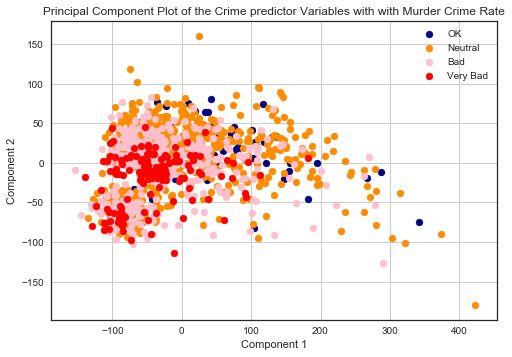

In [49]:
#58
#PCA plot with labels for murder towns
#Drop a color

colors=['navy','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(crimes_predictors_pca[Murder == i, 0],
                   crimes_predictors_pca[Murder == i, 1], 
                   c = color, label=i)

ax.legend(loc = 1)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of the Crime predictor Variables with with Murder Crime Rate')


### In-Class Exercise 5 - Principal Component Analysis on the Log Transformation of the Predictor Variables

- Obtain the principal components for the log transformation of the predictor variables
- Plot the loadings on the first two principal components
- Plot the observations in the first two principal components
- Overlay towns with more than one murder on the first two principal components
- Overlay the violent crime rate binned using the box plot statistics
- Overlay the non-violent crime rate binned using the box plot statistics
- Overlay at least one other crime rate binned using the box plot statistics

Here are is an example:

![ViolCrimeLogPCA.png](attachment:ViolCrimeLogPCA.png)

In [50]:
# 59 perform PCA for predictor variables


n = len(crimes_predictors_df.columns)

pca = PCA(n_components = n)

# log tranform the predictors
log_crimes_preds_df = np.log(crimes_scaled_preds_df +.1)
log_crimes_preds_pca = pca.fit_transform(log_crimes_preds_df)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


crimes_predictors_pca.shape




print('Percent of explained variance (first two components): %0.0f'
     % percent_explained)

crimes_predictors_pca.shape

Percent of explained variance (first two components): 48
Percent of explained variance (first two components): 48


(2215, 102)

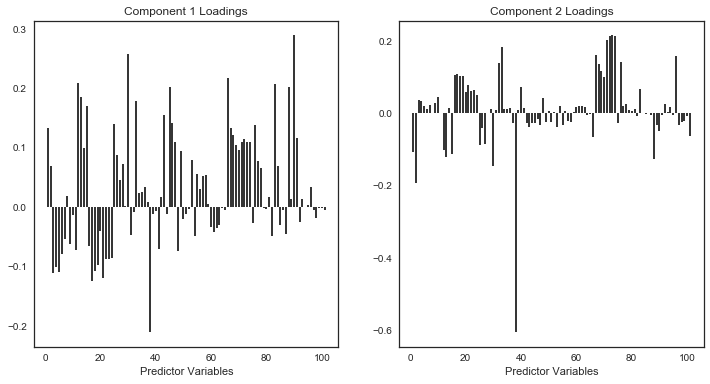

In [51]:

# 60 PCA Loadings
# Log (predictor variables) PCA
fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,n), [0],pca.components_[1,:])
Comp1.set_xlabel('Predictor Variables')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,n), [0],pca.components_[2,:])
Comp2.set_xlabel('Predictor Variables')
Comp2.set_title('Component 2 Loadings')

In [52]:
crime_labels = ['Great','Ok','Neutral','Bad','Very Bad']

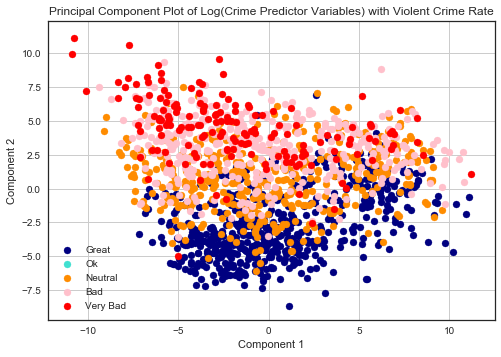

In [53]:
# 61 PCA Plots with labels for murder towns
colors = ['navy','turquoise','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(log_crimes_preds_pca[Violent_Crime == i, 0],
                   log_crimes_preds_pca[Violent_Crime == i, 1], c = color, label=i)
        
ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of Log(Crime Predictor Variables) with Violent Crime Rate')

# save fig
savefig('ViolCrimeLogPCA.png')

In [54]:
crime_labels = ['Great','OK','Neutral','Bad','Very Bad']

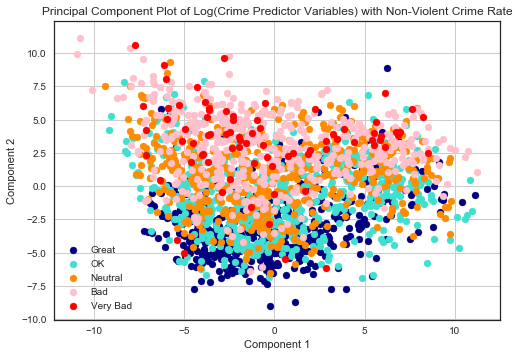

In [55]:
colors = ['navy','turquoise','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(log_crimes_preds_pca[NonViolent_Crime == i, 0],
                   log_crimes_preds_pca[NonViolent_Crime == i, 1], c = color, label=i)


        
ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of Log(Crime Predictor Variables) with Non-Violent Crime Rate')

# save fig
savefig('NonViolCrimeLogPCA.png')

In [56]:
# drop one label
crime_labels = ['Ok','Neutral','Bad','Very Bad']

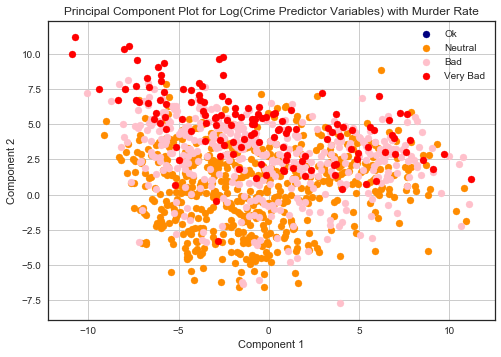

In [57]:
# pca plot with labels for murder towns
# drop a color
colors = ['navy','darkorange','pink','red']

fig, ax = plt.subplots()
for i, color in  zip(crime_labels, colors):
        ax.scatter(log_crimes_preds_pca[Murder == i, 0],
                   log_crimes_preds_pca[Murder == i, 1], c = color, label=i)
        
    
ax.legend(loc = 1)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot for Log(Crime Predictor Variables) with Murder Rate')

# save fig
savefig('LogMurderPCA.png')